In [1]:
import pandas as pd
import gradio as gr
import matplotlib.pyplot as plt
import seaborn as sns
import src.Connectors.gcp_bq_queries as gcp_bq_py
import src.ClassicML.DGE.pydeseq_utils as pydeseq_utils


def generate_histogram(project_id, dataset_id, table_id, primary_site, primary_diagnosis):
    bq_queries = gcp_bq_py.BigQueryQueries(project_id, dataset_id, table_id)
    value_counts = bq_queries.get_all_primary_diagnosis_for_primary_site(primary_site) 
    # Generate histogram data for primary diagnosis in tumor tissue type
    primary_diagnosis_histogram = value_counts.copy()    
    sns.set_theme(rc={'figure.figsize':(19.7,15.27)})
    ax = sns.barplot(data=primary_diagnosis_histogram, y='primary_diagnosis', x='number_of_cases', orient='h')
    # fig, ax = plt.subplots()
    # primary_diagnosis_histogram.plot(kind='bar', ax=ax)
    ax.set_xlabel('Primary Diagnosis')
    ax.set_ylabel('Count')
    ax.set_title('Histogram of Primary Diagnoses in Tumor Tissue Type')
    
    plt.xticks(rotation=90)
    fig = ax.figure.get_figure()
    
    return fig

def retrieve_data_for_pydeseq(project_id, dataset_id, table_id, primary_site, primary_diagnosis):
    bq_queries = gcp_bq_py.BigQueryQueries(project_id, dataset_id, table_id)
    df = bq_queries.get_df_for_pydeseq(primary_site, primary_diagnosis)
    return df 

def update_primary_diagnosis_options(project_id, dataset_id, table_id, primary_site):
    bq_queries = gcp_bq_py.BigQueryQueries(project_id, dataset_id, table_id)
    return bq_queries.get_primary_diagnosis_options(primary_site)

def pydeseq2_analysis(project_id, dataset_id, table_id, primary_site, primary_diagnosis):
    # Placeholder for PyDESeq2 analysis
    bq_queries = gcp_bq_py.BigQueryQueries(project_id, dataset_id, table_id)
    df = bq_queries.query_data(primary_site, primary_diagnosis)
        
    return "PyDESeq2 analysis result"

def supervised_ml_analysis(project_id, dataset_id, table_id, primary_site, primary_diagnosis):
    # Placeholder for Supervised ML analysis
    return "Supervised ML analysis result"

def unsupervised_learning_analysis(project_id, dataset_id, table_id, primary_site, primary_diagnosis):
    # Placeholder for Unsupervised Learning analysis
    return "Unsupervised Learning analysis result"

# def gradio_interface():
#     with gr.Blocks() as demo:
#         with gr.Tab("Data Retrieval"):
#             with gr.Row():
#                 project_id = gr.Textbox(label="Google Cloud Project ID")
#                 dataset_id = gr.Textbox(label="BigQuery Dataset ID")
#                 table_id = gr.Textbox(label="BigQuery Table ID")
#                 primary_site = gr.Textbox(label="Primary Site")
#                 primary_diagnosis = gr.Dropdown(label="Primary Diagnosis", choices=[])
            
#             get_primary_diagnosis_button = gr.Button("Get Primary Diagnosis Options")
            
#             def update_primary_diagnosis_options_wrapper(project_id, dataset_id, table_id, primary_site):
#                 return gr.update(choices=update_primary_diagnosis_options(project_id, dataset_id, table_id, primary_site))
            
#             get_primary_diagnosis_button.click(
#                 update_primary_diagnosis_options_wrapper,
#                 inputs=[project_id, dataset_id, table_id, primary_site],
#                 outputs=primary_diagnosis
#             )
            
#             retrieve_button = gr.Button("Generate Histogram")
#             primary_diagnosis_histogram = gr.Plot(label="Primary Diagnosis Histogram")
#             retrieve_button.click(
#                 generate_histogram,
#                 inputs=[project_id, dataset_id, table_id, primary_site, primary_diagnosis],
#                 outputs=[primary_diagnosis_histogram]
#             )
        
#         with gr.Tab("Analysis"):
#             with gr.Row():
#                 pydeseq_button = gr.Button("Run PyDESeq2 Analysis")
#                 supervised_ml_button = gr.Button("Run Supervised ML Analysis")
#                 unsupervised_ml_button = gr.Button("Run Unsupervised Learning Analysis")
                
#             pydeseq_result = gr.Textbox(label="PyDESeq2 Result")
#             supervised_ml_result = gr.Textbox(label="Supervised ML Result")
#             unsupervised_ml_result = gr.Textbox(label="Unsupervised Learning Result")
            
#             pydeseq_button.click(
#                 pydeseq2_analysis,
#                 inputs=[project_id, dataset_id, table_id, primary_site, primary_diagnosis],
#                 outputs=pydeseq_result
#             )
#             supervised_ml_button.click(
#                 supervised_ml_analysis,
#                 inputs=[project_id, dataset_id, table_id, primary_site, primary_diagnosis],
#                 outputs=supervised_ml_result
#             )
#             unsupervised_ml_button.click(
#                 unsupervised_learning_analysis,
#                 inputs=[project_id, dataset_id, table_id, primary_site, primary_diagnosis],
#                 outputs=unsupervised_ml_result
#             )

#     demo.launch()

# if __name__ == "__main__":
#     gradio_interface()



/opt/homebrew/anaconda3/envs/omixhub/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. Get Data From BQ for particular primary_site and primary_diagnosis

In [3]:
project_id = 'rnaseqml'
dataset_id = 'rnaseqexpression'
table_id = 'expr_clustered_08082024'
primary_site = 'Prostate'
primary_diagnosis = 'Adenocarcinoma, NOS'
bq_queries = gcp_bq_py.BigQueryQueries(project_id, dataset_id, table_id)

I0000 00:00:1723183032.833005 8162785 config.cc:230] gRPC experiments enabled: call_status_override_on_cancellation, event_engine_dns, event_engine_listener, http2_stats_fix, monitoring_experiment, pick_first_new, trace_record_callops, work_serializer_clears_time_cache
I0000 00:00:1723183032.867264 8162785 check_gcp_environment_no_op.cc:29] ALTS: Platforms other than Linux and Windows are not supported


In [9]:
df = bq_queries.get_df_for_pydeseq(primary_site, primary_diagnosis)

I0000 00:00:1723183318.060129 8162785 check_gcp_environment_no_op.cc:29] ALTS: Platforms other than Linux and Windows are not supported


In [10]:
df.head()

,case_id,primary_site,sample_type,tissue_type,primary_diagnosis,expr_unstr_count
0,fd1aa612-df86-4d48-892d-2acebd76ea96,Prostate,Primary Tumor,Tumor,"Adenocarcinoma, NOS","[5996, 3, 1820, 1337, 256, 237, 1351, 2489, 33..."
1,1122fa92-0073-4f59-9880-3f1a34620758,Prostate,Primary Tumor,Tumor,"Adenocarcinoma, NOS","[2813, 0, 1103, 354, 78, 244, 1242, 1429, 2444..."
2,bdd4fefa-512a-4720-9f9e-11eb3892fe3c,Prostate,Primary Tumor,Tumor,"Adenocarcinoma, NOS","[2747, 11, 1070, 673, 91, 144, 322, 2856, 855,..."
3,186d7f36-4e93-4ab2-bc23-95d5cd296656,Prostate,Primary Tumor,Tumor,"Adenocarcinoma, NOS","[1904, 1, 959, 390, 84, 296, 302, 2311, 2207, ..."
4,73f875cb-bcfc-43ba-ab97-4e94caf836d4,Prostate,Primary Tumor,Tumor,"Adenocarcinoma, NOS","[4575, 2, 1579, 637, 214, 543, 2651, 2483, 262..."


## 2. Analysis tab flow of code: 

In [29]:
import src.Engines.analysis_engine as an_eng
from importlib import reload
reload(an_eng)
data_from_bq = df.copy()
analysis_cls = an_eng.Analysis(data_from_bq, analysis_type='DE')
gene_ids_or_gene_cols = list(pd.read_csv('/Users/abhilashdhal/Projects/personal_docs/Transcriptomics/data/gene_annotation/gene_id_to_gene_name_mapping.csv')['gene_id'])
exp_data = analysis_cls.expand_data_from_bq(data_from_bq, gene_ids_or_gene_cols, 'DE')
counts_for_de = analysis_cls.counts_from_bq_df(exp_data, gene_ids_or_gene_cols)
metadata = analysis_cls.metadata_for_pydeseq(exp_data)
res_pydeseq = analysis_cls.run_pydeseq(metadata, counts_for_de)

## 3. Visualization for OmixHub

In [32]:
import seaborn as sns

I0000 00:00:1723109598.646034 7335701 check_gcp_environment_no_op.cc:29] ALTS: Platforms other than Linux and Windows are not supported


(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 [Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300'),
  Text(350.0, 0, '350'),
  Text(400.0, 0, '400'),
  Text(450.0, 0, '450')])

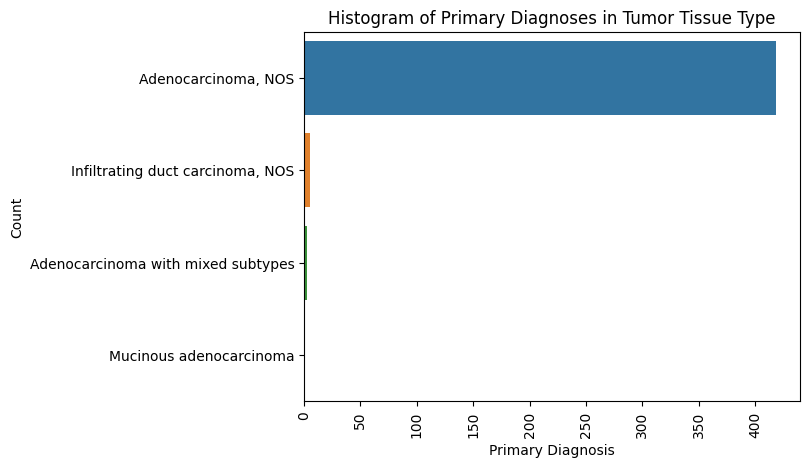

In [42]:
value_counts = bq_queries.get_all_primary_diagnosis_for_primary_site(primary_site) 
# Generate histogram data for primary diagnosis in tumor tissue type
primary_diagnosis_histogram = value_counts.copy()    
ax = sns.barplot(data=primary_diagnosis_histogram, y='primary_diagnosis', x='number_of_cases', orient='h')
# fig, ax = plt.subplots()
# primary_diagnosis_histogram.plot(kind='bar', ax=ax)
ax.set_xlabel('Primary Diagnosis')
ax.set_ylabel('Count')
ax.set_title('Histogram of Primary Diagnoses in Tumor Tissue Type')
plt.xticks(rotation=90)

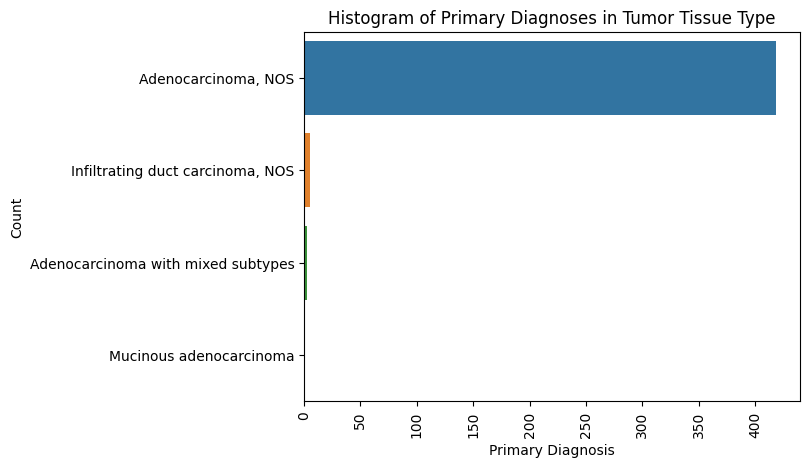

In [45]:
fig